## Exercício 6

**Importando bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats

**Importando dados como um dataframe**

In [2]:
dataframe = pd.read_fwf('data.txt',header=None,
names=["Router1", "Router2", "Router3", "Router4","Router5","Router6","Router7", "Room"])

**Criando função para plotar gaussiana**

In [3]:
def plotGaussian(df):
    
    mean = df.mean() # Média do dataset
    std = df.std() # Desvio padrão do dataset
    
    # Gerando uma distruibuição normal com os dados do dataset
    x_values = np.linspace(df.min(), df.max(), 400)
    y_values = stats.norm.pdf(x_values, mean, std)
    
    plt.plot(x_values, y_values)

---

### Calculando M

Isolando os roteadores

In [4]:
ex6Router1 = dataframe.loc[:, 'Router1'] # Isolando o roteador 
ex6Router2 = dataframe.loc[:, 'Router2'] # Isolando o roteador
ex6Router3 = dataframe.loc[:, 'Router3'] # Isolando o roteador 
ex6Router4 = dataframe.loc[:, 'Router4'] # Isolando o roteador 
ex6Router5 = dataframe.loc[:, 'Router5'] # Isolando o roteador
ex6Router6 = dataframe.loc[:, 'Router6'] # Isolando o roteador 
ex6Router7 = dataframe.loc[:, 'Router7'] # Isolando o roteador 

Realizando a operação

In [5]:
M = (ex6Router1 + ex6Router2 + ex6Router3 + ex6Router4 + ex6Router5 + ex6Router6 + ex6Router7)/7

Gerando o Histograma

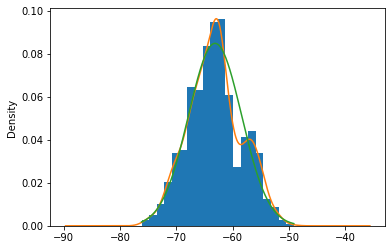

In [6]:
M.hist(bins=20, density=1) # Gerando um histograma com frequência relativa e com bins=20
M.plot.density() # Laranja
plotGaussian(M) # Verde

---

### Calculando a FDP

Declarando variáveis

In [7]:
# Melhores valores encontrados
p = 0.7
m1 = -63
m2 = -55
a1 = 2.9
a2 = 2.3

Criando função

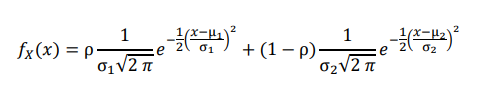

In [8]:
def fdp(x):    
    return (p*(1/(a1*math.sqrt(2*math.pi)))*math.exp(-0.5*math.pow(((x-m1)/a1), 2))+((1-p)*(1/(a2*math.sqrt(2*math.pi)))*math.exp(-0.5*math.pow(((x-m2)/a2), 2))))
fdp = np.vectorize(fdp) 

Plotando gráfico

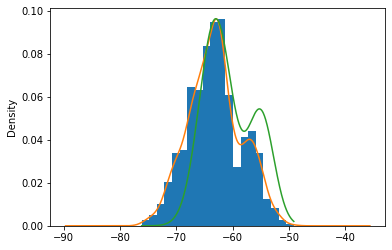

In [9]:
x = np.linspace(M.min(), M.max(), 400)
M.hist(bins=20, density=1) # Gerando um histograma com frequência relativa e com bins=20
M.plot.density() # Laranja
plt.plot(x,fdp(x)) # Verde - FDP

----

### Resposta
Podemos observar pelos gráficos que a FDP melhor se adptou ao histograma 

In [10]:
stats.shapiro(M)

(0.9936459064483643, 1.3913262364440016e-07)

Para comprovar essa resposta foi utilizado o shapiro, para o nível de significância de 5% obteve-se o seguinte resultado: <br>
5% -> Rejeita H0 -> rejeita a normalidade<br>
**Portanto pode-se dizer com mais certeza que a FDP melhor se ajusta ao histograma**